In [46]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [66]:
import yfinance as yf

msft = yf.Ticker("MSFT")

In [67]:
msft.history(period='1mo')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-07,207.059998,210.110001,206.720001,209.830002,25681100,0,0
2020-10-08,210.509995,211.190002,208.320007,210.580002,19925800,0,0
2020-10-09,211.229996,215.860001,211.229996,215.809998,26458000,0,0
2020-10-12,218.789993,223.860001,216.809998,221.399994,40461400,0,0
2020-10-13,222.720001,225.210007,220.429993,222.860001,28950800,0,0
2020-10-14,223.000000,224.220001,219.130005,220.860001,23451700,0,0
2020-10-15,217.100006,220.360001,216.009995,219.660004,22733100,0,0
2020-10-16,220.149994,222.289993,219.320007,219.660004,26057900,0,0
2020-10-19,220.419998,222.300003,213.720001,214.220001,27625800,0,0


In [21]:
df = msft.history(period='2y')['Open'].values
df = df.reshape(-1,1)

In [22]:
df.shape

(504, 1)

In [23]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(403, 1)
(151, 1)


In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.13567621],
       [0.15873017],
       [0.14944985],
       [0.13548096],
       [0.11721358],
       [0.1271482 ],
       [0.09663656]])

In [25]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.66708544],
       [0.75962853],
       [0.72049488],
       [0.72738329],
       [0.70731746],
       [0.75373863],
       [0.77570135]])

In [26]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [27]:
x_train, y_train = create_my_dataset(dataset_train)
x_train[:1]

array([[0.13567621, 0.15873017, 0.14944985, 0.13548096, 0.11721358,
        0.1271482 , 0.09663656, 0.11714125, 0.12881608, 0.06534015,
        0.08299949, 0.06897007, 0.09467446, 0.10919439, 0.12508802,
        0.14902645, 0.15265635, 0.17522127, 0.16482174, 0.10477961,
        0.12989526, 0.09477241, 0.1438266 , 0.15452038, 0.14166821,
        0.12861983, 0.10075717, 0.08447113, 0.08349013, 0.07760361,
        0.06367206, 0.02491947, 0.        , 0.04081313, 0.06818518,
        0.06033652, 0.04326571, 0.04866166, 0.04493357, 0.06377032,
        0.07750545, 0.0855503 , 0.0792715 , 0.07897709, 0.06632113,
        0.07230583, 0.0992855 , 0.09673463, 0.12086926, 0.11390358]])

In [28]:
y_train[:1]

array([0.10772271])

In [29]:
x_test, y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.66708544, 0.75962853, 0.72049488, 0.72738329, 0.70731746,
        0.75373863, 0.77570135, 0.80664887, 0.85856096, 0.82990954,
        0.79866249, 0.77759816, 0.80475211, 0.78428677, 0.82951013,
        0.81952706, 0.79586719, 0.86355237, 0.82162366, 0.80854572,
        0.86974189, 0.88431733, 0.90518193, 0.91326801, 0.89499905,
        0.93143729, 0.88900931, 0.83899398, 0.85416833, 0.92095504,
        0.91376726, 0.91670933, 0.9226158 , 0.90049179, 0.93202607,
        0.87055925, 0.87596524, 0.8958867 , 0.8939847 , 0.91110334,
        0.91680963, 0.91160383, 0.89478554, 0.92802179, 0.94864411,
        0.97997831, 1.        , 0.97407175, 0.91440693, 0.99759729]])

In [30]:
#reshaping for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)


(353, 50, 1)
(101, 50, 1)


In [31]:
tf.logging.set_verbosity(tf.logging.ERROR)
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dropout_3 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [33]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
if(not os.path.exists('C:\code\ML\stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('C:\code\ML\stock_prediction.h5')
else:
    model = load_model('stock_prediction.h5')

range(403, 504)


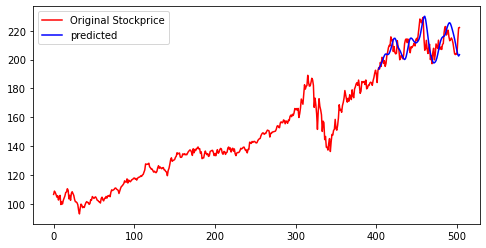

In [36]:
#visualizing our predictions
%matplotlib inline
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red', label='Original Stockprice')
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions,color='blue',label='predicted')
plt.legend()
print(range(len(y_train)+50,len(y_train)+50+len(predictions)))

In [27]:
msft.history('1mo')['Open'].values.reshape(-1,1)

array([[208.82000732],
       [207.05999756],
       [210.50999451],
       [211.22999573],
       [218.78999329],
       [222.72000122],
       [223.        ],
       [217.1000061 ],
       [220.1499939 ],
       [220.41999817],
       [215.80000305],
       [213.11999512],
       [213.92999268],
       [215.02999878],
       [213.8500061 ],
       [211.58999634],
       [207.66999817],
       [204.07000732],
       [203.5       ],
       [204.28999329],
       [203.88999939],
       [214.02000427],
       [222.03999329]])

In [101]:
my_list = ["" for i in range(0,df.shape[0]-len(predictions))]
another_list = predictions.flatten().tolist()
my_list.extend(another_list) 
print(my_list)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

In [82]:
["" for i in range(0,df.shape[0]-len(predictions))].append(predictions)

In [92]:
["",""].extend(predictions.flatten().tolist())

In [74]:
predictions.flatten().tolist()

[193.4510955810547,
 194.59060668945312,
 195.72683715820312,
 197.08941650390625,
 198.38482666015625,
 199.9186248779297,
 201.55592346191406,
 202.83383178710938,
 203.74563598632812,
 203.97779846191406,
 203.72410583496094,
 203.51904296875,
 203.6763916015625,
 204.4232940673828,
 205.746826171875,
 207.3804931640625,
 209.53253173828125,
 211.73606872558594,
 213.75848388671875,
 214.7235870361328,
 214.84335327148438,
 213.98106384277344,
 212.31663513183594,
 210.21946716308594,
 208.66639709472656,
 207.5337371826172,
 206.65283203125,
 205.4641571044922,
 204.0559844970703,
 202.7412872314453,
 201.60450744628906,
 200.62478637695312,
 200.10121154785156,
 200.5885772705078,
 202.21788024902344,
 204.77687072753906,
 207.6552276611328,
 210.630615234375,
 213.15509033203125,
 214.66421508789062,
 214.99942016601562,
 214.6845245361328,
 213.9599151611328,
 213.1103057861328,
 212.36785888671875,
 211.92596435546875,
 211.63970947265625,
 211.78656005859375,
 212.377044677734

In [60]:
len(predictions)

101

In [63]:
pd.DataFrame({
    "opening_price": df.flatten().tolist(),
    "predicted_prices": predictions.flatten().tolist(),
}).to_csv('graph_1.csv')

In [1]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Price of testing set')
plt.plot(predictions,color='blue',label='predicted')
plt.legend()
plt.savefig('image.png')

NameError: name 'scaler' is not defined